In [1]:
#https://www.kaggle.com/omkigidla/123qweasd

import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for (columnName) in df.select_dtypes(exclude=["number"]):
    le.fit(df[columnName])
    df[columnName]=le.transform(df[columnName])

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
df=df.drop(['CustomerID'],axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(df)
scaled_df = pd.DataFrame(s.transform(df), columns = df.columns )

X=scaled_df.to_numpy()

In [8]:
import sklearn
from sklearn.decomposition import PCA
import numpy as np

X=np.array(X)

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [9]:
PCA_X=pca.transform(X)

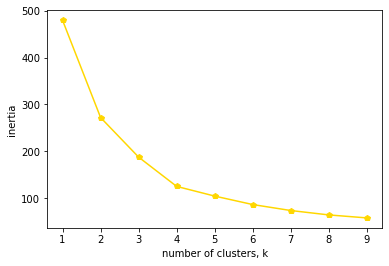

In [10]:
#Elbo method for selecting optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k,       )
    
    # Fit model to samples
    model.fit(PCA_X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

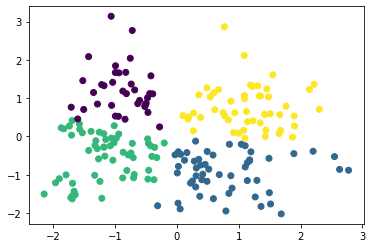

In [11]:
model = KMeans(n_clusters=4)
model.fit(PCA_X)

labels = model.predict(PCA_X)
plt.scatter(PCA_X.T[0], PCA_X.T[1], c=labels)
plt.show()

In [12]:
cluster_0_sp=[]
cluster_1_sp=[]
cluster_2_sp=[]
cluster_3_sp=[]

for i in np.arange(labels.shape[0]):
    if labels[i]==0:
        cluster_0_sp.append(df["Spending Score (1-100)"])   
    elif labels[i]==1:
        cluster_1_sp.append(df["Spending Score (1-100)"][i])
    elif labels[i]==2:
        cluster_2_sp.append(df["Spending Score (1-100)"][i])
    elif labels[i]==3:
        cluster_3_sp.append(df["Spending Score (1-100)"][i])
    else:    
        pass

(array([8., 4., 3., 2., 3., 6., 6., 6., 9., 7.]),
 array([ 3. ,  8.6, 14.2, 19.8, 25.4, 31. , 36.6, 42.2, 47.8, 53.4, 59. ]),
 <BarContainer object of 10 artists>)

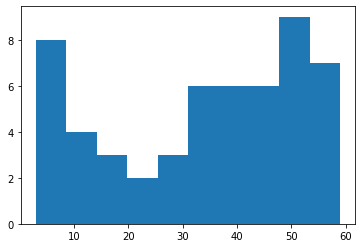

In [13]:
import matplotlib.pyplot as plt
#Histogram of spending scores in the first cluster
plt.hist(cluster_1_sp)

(array([ 2.,  7.,  3.,  7.,  5.,  2., 16.,  6.,  4.,  7.]),
 array([29., 36., 43., 50., 57., 64., 71., 78., 85., 92., 99.]),
 <BarContainer object of 10 artists>)

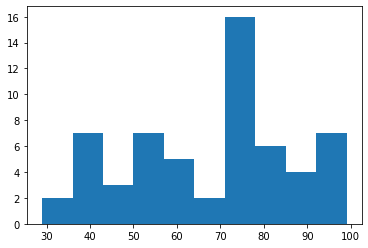

In [14]:
#Histogram of birthdates in the second cluster
plt.hist(cluster_2_sp)

(array([4., 6., 9., 3., 3., 4., 4., 8., 4., 6.]),
 array([ 1. ,  6.9, 12.8, 18.7, 24.6, 30.5, 36.4, 42.3, 48.2, 54.1, 60. ]),
 <BarContainer object of 10 artists>)

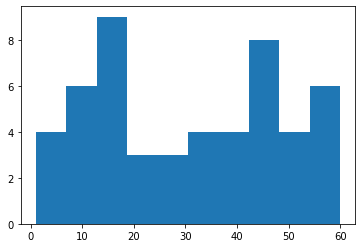

In [15]:
#Histogram of birthdates in the third cluster
plt.hist(cluster_3_sp)

(array([4., 6., 9., 3., 3., 4., 4., 8., 4., 6.]),
 array([ 1. ,  6.9, 12.8, 18.7, 24.6, 30.5, 36.4, 42.3, 48.2, 54.1, 60. ]),
 <BarContainer object of 10 artists>)

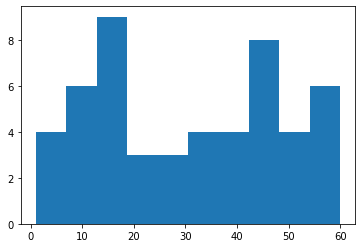

In [16]:
#Histogram of birthdates in the fourth cluster
plt.hist(cluster_3_sp)

In [17]:
#Prediction of spending score using Random Forest
y=np.array(df['Spending Score (1-100)'])
df=df.drop(['Spending Score (1-100)'],axis=1)
X=df.to_numpy()


In [18]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()
reg.fit(X,y)
y_pred=reg.predict(X)

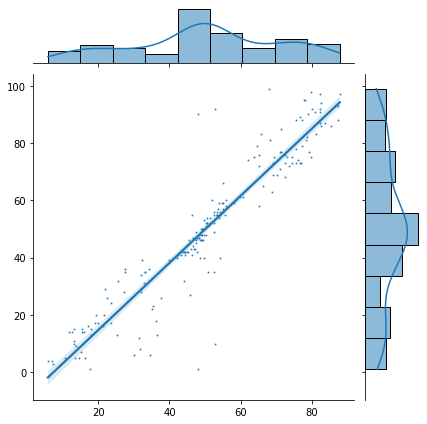

In [19]:
import seaborn as sns
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(x=y_pred,
            y=y, 
            kind="reg", 
            scatter_kws={"s": 1});

In [20]:
r2(y,y_pred)

0.8716524202024132

In [21]:
#Novelty detection among customers

df=pd.read_csv("Mall_Customers.csv")

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for (columnName) in df.select_dtypes(exclude=["number"]):
    le.fit(df[columnName])
    df[columnName]=le.transform(df[columnName])
    
df=df.drop(['CustomerID'],axis=1)
    
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(df)
scaled_df = pd.DataFrame(s.transform(df), columns = df.columns )

X=scaled_df.to_numpy()

In [22]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)

In [23]:
df=pd.read_csv("Mall_Customers.csv")

novelty_customers=[]

for i in np.arange(0,yhat.shape[0]):
    if yhat[i]<0:
        novelty_customers.append(df['CustomerID'][i])

In [24]:
novelty_customers

[1,
 2,
 3,
 9,
 11,
 12,
 13,
 31,
 33,
 34,
 141,
 186,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200]